In [61]:
# Importação de Bibliotecas
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
# Leitura de Dados no formato .CSV
df_spc = pd.read_csv("novo_dataset.csv")
df_spc.head() # primeiros 5 registros

,ID_USUARIO,DATA_NASCIMENTO,RENDA,RENDA_FIXA,LATITUDE,LONGITUDE,TIPO_PESSOA,CIDADE,ESTADO,LOGRADOURO,ANO,MES,DIA,HORA,IDADE,FAIXA ETARIA
0,d6c0cc1d-eb61-486a-b5c3-50725ef44d61,1981-01-30,"DE R$ 1.900,00 A R$ 3.800,00",3104.0,-4.847580,-37.784390,CPF,Jaguaruana,Ceará,street_address,1981.0,1.0,30.0,0.0,40.0,30 a 40 anos
1,da0067e7-aa6b-4355-b373-ca17f6ac3b44,1978-01-28,"DE R$ 3.800,00 A R$ 7.600,00",5703.0,-26.990118,-48.637165,CPF,Balneário Camboriú,Santa Catarina,street_address,1978.0,1.0,28.0,0.0,43.0,40 a 50 anos
2,2d729b8a-d53c-48e7-8bf5-33b021980c04,1954-09-12,"DE R$ 3.800,00 A R$ 7.600,00",3901.0,-5.053671,-42.813152,CPF,Teresina,Piauí,street_address,1954.0,9.0,12.0,0.0,67.0,60 a 70 anos
3,62c0f1e6-36f2-4205-a134-232a58a6f8a5,1975-08-28,"DE R$ 788,00 A R$ 1.140,00",1086.0,-15.059042,-48.163372,CNPJ,Mimoso de Goiás,Goiás,establishment,1975.0,8.0,28.0,0.0,46.0,40 a 50 anos
4,0cef9719-0aa3-49a2-adea-9c09c04de071,1957-06-17,"DE R$ 788,00 A R$ 1.140,00",836.0,-17.694658,-42.522280,CPF,Capelinha,Minas Gerais,street_address,1957.0,6.0,17.0,0.0,64.0,60 a 70 anos


In [57]:
df_spc.RENDA.unique()
# nao possui a faixa de renda de R$: 1140,00 a 1900

array(['DE R$ 1.900,00 A R$ 3.800,00', 'DE R$ 3.800,00 A R$ 7.600,00',
       'DE R$ 788,00 A R$ 1.140,00', 'MAIOR QUE R$ 7.600,00'],
      dtype=object)

In [3]:
df_spc["LATLONG"] = df_spc["LATITUDE"].astype(str) + df_spc["LONGITUDE"].astype(str)
df_spc["LATLONG"] 

0              -4.84758-37.78439
1       -26.99011814-48.63716523
2       -5.053671016-42.81315203
3           -15.059042-48.163372
4            -17.694658-42.52228
                  ...           
9995    -11.60937194-47.04750645
9996    -15.65049668-47.79332059
9997    -8.330678649-36.13689703
9998                      nannan
9999        -15.787504-48.139096
Name: LATLONG, Length: 10000, dtype: object

In [35]:
df_novo=df_spc[['RENDA_FIXA','ESTADO']]
df_novo

,RENDA_FIXA,ESTADO
0,3104.0,Ceará
1,5703.0,Santa Catarina
2,3901.0,Piauí
3,1086.0,Goiás
4,836.0,Minas Gerais
...,...,...
9995,2776.0,Tocantins
9996,4099.0,Distrito Federal
9997,1052.0,Pernambuco
9998,958.0,NaN


In [55]:
df_novo.RENDA_FIXA.unique()

array([3104., 5703., 3901., ..., 6889., 3945., 5954.])

In [45]:
df_media=df_novo['RENDA_FIXA']>=1900.0 and 
df_media = df[df_mask]
df_media

0        True
1        True
2        True
3       False
4       False
        ...  
9995     True
9996     True
9997    False
9998    False
9999     True
Name: RENDA_FIXA, Length: 10000, dtype: bool

In [54]:
df_baixa=df_novo['RENDA_FIXA']>=7000.0
filtered_df_baixa = df_novo[df_baixa]
filtered_df_baixa

,RENDA_FIXA,ESTADO
27,7196.0,NaN
30,7405.0,São Paulo
58,7544.0,São Paulo
59,7386.0,Paraíba
109,7074.0,Rio de Janeiro
...,...,...
9832,7080.0,São Paulo
9841,7173.0,São Paulo
9882,7302.0,São Paulo
9902,7536.0,Rio de Janeiro


In [39]:
values=[1900.0,3799.0]
df_media = df_novo[df_novo.RENDA_FIXA.isin(values)]
df_media

,RENDA_FIXA,LATLONG
1380,3800.0,2973
3623,1900.0,1170
8498,3800.0,6809
8573,1900.0,1537
9577,1900.0,4654


In [40]:
values=[788.0,1140.0]
df_baixa = df_novo[df_novo.RENDA_FIXA.isin(values)]
df_baixa

,RENDA_FIXA,LATLONG
516,788.0,7997
867,1140.0,6795
1043,788.0,7908
1216,788.0,8510
1322,788.0,253
1735,1140.0,6920
1838,1140.0,8510
3088,788.0,6363
3251,788.0,2861
3376,1140.0,645


In [ ]:
values=[3800.0,7600.0]
df_baixa = df_novo[df_novo.RENDA_FIXA.isin(values)]
df_baixa

In [11]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [37]:
state_encoder = LabelEncoder()
state_encoder.fit(filtered_df_baixa['ESTADO'].unique())
filtered_df_baixa['ESTADO'] = state_encoder.transform(filtered_df_baixa['ESTADO'])
filtered_df_baixa['ESTADO'].unique()

<ipython-input-37-dc6006ce50c4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_baixa['ESTADO'] = state_encoder.transform(filtered_df_baixa['ESTADO'])


array([21, 19, 12, 17, 16, 11,  2, 10,  6, 18,  8, 14,  4,  9,  1,  7,  5,
        0,  3, 20, 13, 15])

In [38]:
# Cálculo do WCSSE - Within Cluster Sum of Squared Errors
wcsse = []
maxclusters = 11
for i in range(1, maxclusters):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(filtered_df_baixa)
    print (i,kmeans.inertia_)
    wcsse.append(kmeans.inertia_)

1 10091656.150306748
2 2591536.0404778942
3 1056035.2214266083
4 626135.9027670801
5 387822.4191018245
6 264743.106454807
7 196003.18482871613
8 160322.90228455464
9 130537.9946463762
10 104620.1712825318


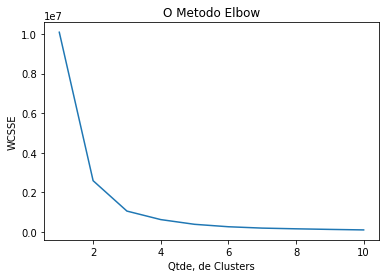

In [39]:
# Plotagem do Gráfico para visualização do "cotovelo" - Método de Elbow
# Ao final do Estudo do Metodo de Elbow a seguir, foram gerados 11 clusters
plt.plot(range(1, maxclusters), wcsse)
plt.title('O Metodo Elbow')
plt.xlabel('Qtde, de Clusters')
plt.ylabel('WCSSE') # Within Cluster Sum of Squares
plt.show()

In [40]:
# Criação do modelo de Agrupamento (Clustering) usando K-Means
# Parametrizando K-Means com 3 Clusters e Metodo de Inicialização Randômica
kmeans = KMeans(n_clusters = 3, init = 'random')
kmeans

KMeans(init='random', n_clusters=3)

In [41]:
# Treino do modelo com os Dados
kmeans.fit(filtered_df_baixa)

KMeans(init='random', n_clusters=3)

In [42]:
# Exibindo os Centroids - São 3 grupos, portanto, 3 linhas com 8 colunas = 8 features
kmeans.cluster_centers_

array([[7518.28571429,   14.68367347],
       [7319.15929204,   14.5840708 ],
       [7105.97391304,   14.17391304]])

In [43]:
# Treinando novamente o modelo com os Dados - Observe que novos Centroids são calculados (inicialização randômica!)
kmeans.fit(filtered_df_baixa)

KMeans(init='random', n_clusters=3)

In [44]:
# Exibindo os Centroids - São 3 grupos, portanto, 3 linhas com 8 colunas = 8 features
kmeans.cluster_centers_

array([[7319.15929204,   14.5840708 ],
       [7105.97391304,   14.17391304],
       [7518.28571429,   14.68367347]])

In [45]:
# Executa K-Means para agrupar os dados e retorna Tabela de Distancias (fit_transform)
# Calcula a distância entre os dados de cada linha (instância) e cada um dos 3 clusters
distance = kmeans.fit_transform(filtered_df_baixa)
distance

array([[ 90.28450474, 322.3476037 , 123.32629631],
       [299.06502938, 113.36791317,  85.9542179 ],
       [438.0526726 ,  26.07403238, 224.88406877],
       [280.03452515, 132.31293326,  66.89063958],
       [ 32.09856512, 444.29175244, 245.17119567],
       [157.03670456, 255.28910794,  56.17713892],
       [ 10.46674092, 422.30178065, 223.18807133],
       [420.03559431,   8.0545374 , 206.85481668],
       [264.04516341, 148.33146164,  50.96688287],
       [ 13.40718708, 399.30270608, 200.19137782],
       [317.25974212,  96.12618228, 104.60043723],
       [234.07584346, 178.33795612,  21.30341614],
       [ 63.10595345, 349.30513832, 150.20205907],
       [191.05245254, 221.31637264,  22.4472668 ],
       [445.03506024,  32.79618664, 231.85329539],
       [388.04853525,  24.733231  , 174.9007915 ],
       [216.04457182, 196.29938105,   3.72911996],
       [491.03634468,  78.8004329 , 277.86382378],
       [ 44.55212448, 368.33987475, 169.28092104],
       [ 32.08474601, 381.38458

In [46]:
# Para cada uma das 100 linhas do dataset, a qual dos 3 clusters ela pertence..0, 1 ou 2 ?
# São 100 elementos no array, um por linha
labels = kmeans.labels_
labels

array([0, 2, 1, 2, 0, 2, 0, 1, 2, 0, 1, 2, 0, 2, 1, 1, 2, 1, 0, 0, 2, 2,
       0, 1, 0, 0, 2, 1, 2, 1, 2, 0, 1, 1, 0, 1, 1, 2, 0, 1, 1, 1, 0, 0,
       0, 2, 2, 0, 0, 2, 2, 2, 2, 1, 0, 0, 1, 1, 2, 1, 1, 0, 0, 0, 0, 0,
       2, 0, 2, 1, 2, 2, 1, 2, 2, 1, 2, 0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 2,
       2, 0, 2, 1, 1, 0, 2, 0, 0, 2, 1, 2, 0, 1, 1, 0, 0, 0, 1, 2, 2, 0,
       2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 0, 2, 0, 1, 1, 1, 2, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 2, 0, 0, 1, 1, 2, 0, 2, 2, 0, 0, 2, 1, 2, 0,
       0, 0, 1, 2, 1, 1, 2, 2, 0, 1, 1, 2, 2, 0, 1, 0, 2, 1, 0, 0, 1, 1,
       2, 1, 0, 0, 2, 0, 0, 2, 1, 2, 2, 1, 1, 2, 0, 2, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 2, 2, 1, 0, 1, 1, 0, 2, 1, 1, 0, 1, 2, 2, 0, 2,
       0, 2, 2, 1, 2, 2, 2, 0, 2, 0, 0, 2, 1, 0, 2, 0, 0, 0, 1, 0, 2, 1,
       0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 1, 0, 2, 2, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 2, 2,
       2, 2, 2, 1, 0, 0, 2, 0, 1, 2, 1, 2, 1, 2, 0,

In [47]:
# Exibindo novamente os Centroids (atualizados) - São 3 grupos, portanto, 3 linhas com 8 colunas = 8 features
kmeans.cluster_centers_

array([[7105.97391304,   14.17391304],
       [7518.28571429,   14.68367347],
       [7319.15929204,   14.5840708 ]])

In [48]:
filtered_df_baixa.iloc[:, 0],

(27      7196.0
 30      7405.0
 58      7544.0
 59      7386.0
 109     7074.0
          ...  
 9832    7080.0
 9841    7173.0
 9882    7302.0
 9902    7536.0
 9933    7395.0
 Name: RENDA_FIXA, Length: 326, dtype: float64,)

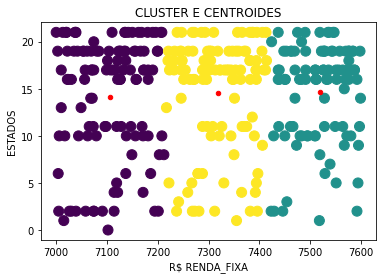

In [50]:
# Visualizando os Clusters - Exemplo 2
# Dados: 0.RENDA, 1.LATITUDE, 2.LONGITUDE
plt.scatter(filtered_df_baixa.iloc[:, 0], filtered_df_baixa.iloc[:, 1], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 20, c = 'red')
plt.title('CLUSTER E CENTROIDES')
plt.xlabel('R$ RENDA_FIXA')
plt.ylabel('ESTADOS')
plt.show()